### Import Library Needed

In [1]:
%pylab inline
# Import the OpenCV bindings
import cv2
# To Increase the image size
pylab.rcParams['figure.figsize'] = (8.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


### Load Image

(-0.5, 1199.5, 899.5, -0.5)

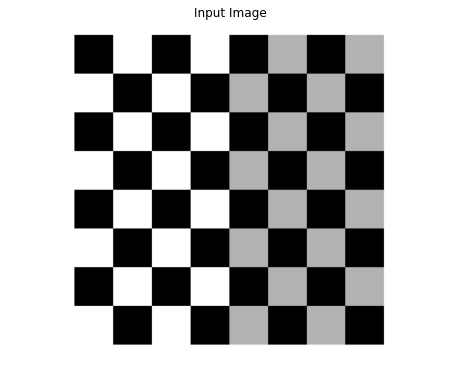

In [2]:
# Load the Image
im = cv2.imread('checkerboard_101.png')
# Convert the image to grayscale
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
imshow(im)
title('Input Image')
axis('off')

### Filter Image Using Sobel Filter in X-Axis

(-0.5, 1199.5, 899.5, -0.5)

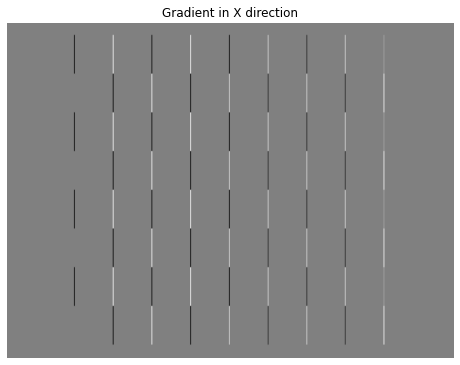

In [3]:
# Calculate the gradient in X direction
# I skipped Gaussian Smoothening after the derivative
i_x = cv2.Sobel(im_gray, cv2.CV_64F, 1, 0)
imshow(i_x, cmap=gray())
title('Gradient in X direction')
axis('off')

### Filter Image Using Sobel Filter in Y-Axis

(-0.5, 1199.5, 899.5, -0.5)

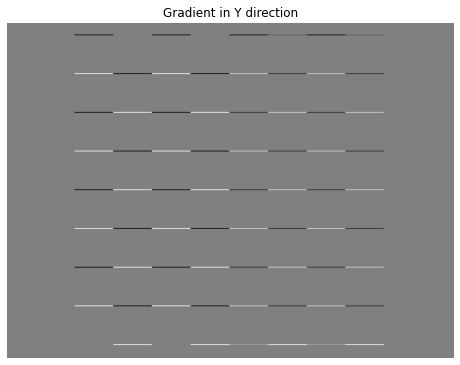

In [4]:
# Calculate the gradient in Y direction
# I skipped Gaussian Smoothening after the derivative
i_y = cv2.Sobel(im_gray, cv2.CV_64F, 0, 1)
imshow(i_y, cmap=gray())
title('Gradient in Y direction')
axis('off')

### Compute second moment matrix M in a Gaussian window around each pixel

In [5]:
# Calculate the product of derivates in each direction
i_xx = multiply(i_x, i_x)
i_xy = multiply(i_x, i_y)
i_yy = multiply(i_y, i_y)

### Compute Gaussian derivatives at each pixel

In [6]:
# Calculate the sum of product of derivates
s_xx = cv2.GaussianBlur(i_xx, (5,5), 0)
s_xy = cv2.GaussianBlur(i_xy, (5,5), 0)
s_yy = cv2.GaussianBlur(i_yy, (5,5), 0)

### Compute corner response function R

(-0.5, 1199.5, 899.5, -0.5)

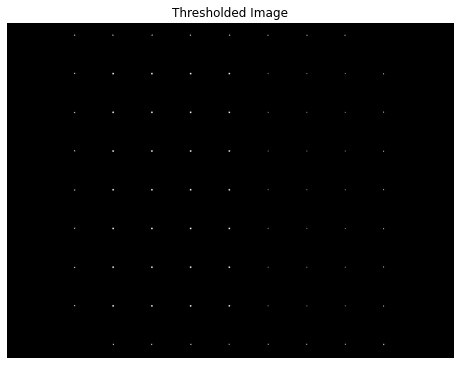

In [7]:
# Compute the response of the detector at each point
k = .04 # Recommended value between .04 and .06
det_h = multiply(s_xx, s_yy) - multiply(s_xy, s_xy)
trace_h = s_xx + s_yy
R = det_h - k*multiply(trace_h, trace_h)

### Threshold R

In [ ]:
# Threshold the image
ratio = .2 # Number to tweak
thresh = abs(R) > ratio * abs(R).max()
imshow(thresh, cmap=gray())
title('Thresholded Image')
axis('off')

### Find local maxima of response function (non-maximum suppression)

In [9]:
# Get the indexes of the non zero values
non_zero_cords = np.nonzero(thresh)

# Tupled Co-ordinates
tuple_cords = [(i, j) for i,j in zip(non_zero_cords[0], non_zero_cords[1])] 
# Values at the these co-ordinates
values = [abs(R)[i, j] for i, j in tuple_cords]
# Sort the co-ordinates based on the R values
sorted_cords = [tuple_cords[i] for i in argsort(values)[::-1]]
# Set Distance to perform NMS
# Any point with this distance of an 
# already selected point will be suppressed
distance = 10 # Number to tweak 
# List to hold the cords after NMS
nms_cords = []
nms_cords.append(sorted_cords[0])
for cord in sorted_cords:
    for nms_cord in nms_cords:
        if abs(cord[0]-nms_cord[0]) < distance and abs(cord[1]-nms_cord[1]) < distance:
            break
    else:
        nms_cords.append(cord)
print("Number of points detected before NMS = {} ".format(sum(thresh)))
print("Number of points detected after NMS = {} ".format(len(nms_cords)))

Number of points detected before NMS = 737 
Number of points detected after NMS = 79 


(-0.5, 1199.5, 899.5, -0.5)

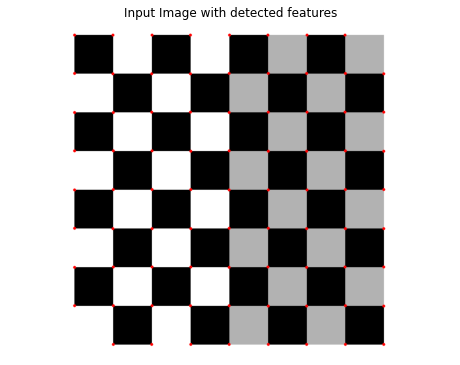

In [10]:
# Draw the image with the detected corners
for nms_cord in nms_cords:
    cv2.circle(im, (nms_cord[1], nms_cord[0]), 4, (0, 0, 255), -1)
imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
title('Input Image with detected features')
axis('off')